In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#% matplotlib inline

path = os.getcwd() + '\salary.txt'
data = pd.read_csv(path, header=None, names=['ExperienceInYears', 'Salary'])
data.head()

,ExperienceInYears,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.describe()

,ExperienceInYears,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot: xlabel='ExperienceInYears', ylabel='Salary'>

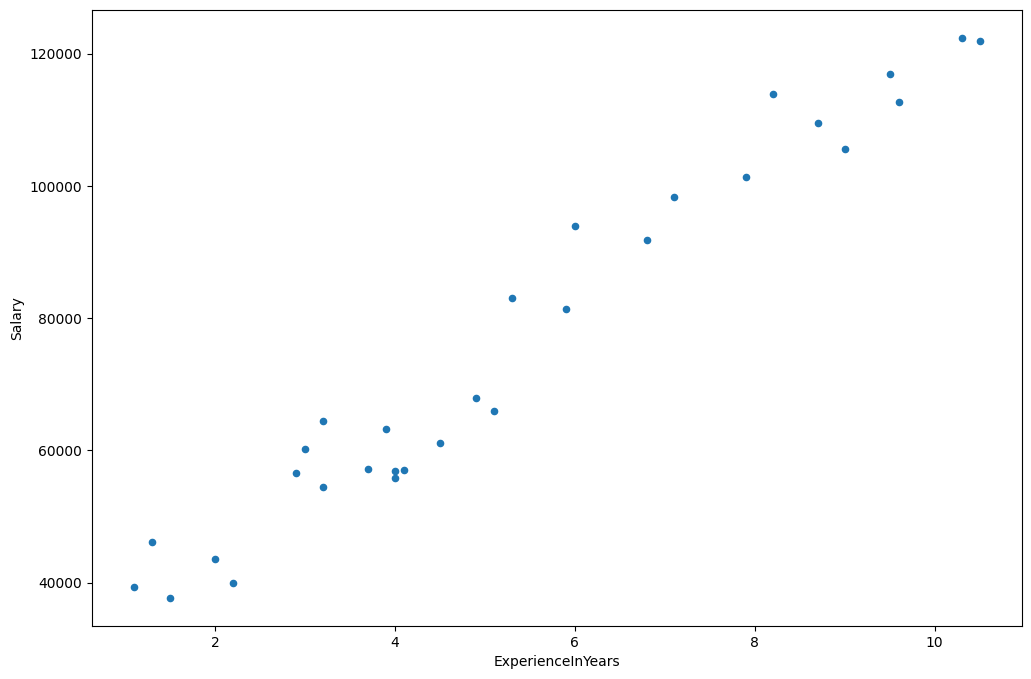

In [7]:
data.plot(kind='scatter', x='ExperienceInYears', y='Salary', figsize=(12, 8))

In [8]:
#Vypočítá hodnotu chyby, pomocí metody nejmenších čtverců
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [9]:
#Nyní potřebujeme upravit data. Nejprve přečíslujeme řádky, aby první řádek neměl číslo 0,
#ale 1, protože jinak by maticové operace neprobíhaly korektně.
#Dále je třeba rozdělit data na nezávislou proměnnou X a závisle proměnnou y.

#append a ones columnto the front of the data set
data.insert(0, 'Ones', 1)

#Set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

In [10]:
#convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [12]:
#ukáže nám tvar matice
X.shape, theta.shape, y.shape

((30, 2), (1, 2), (30, 1))

In [14]:
computeCost(X, y, theta)

3251477635.366667

In [16]:
#sestupný algoritmus, který hledá globální minimum
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


#initialize variable for learning rate and iterations
alpha = 0.01
iters = 1000

#perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

Text(0.5, 1.0, 'Predicted Salary vs. Experience in Years')

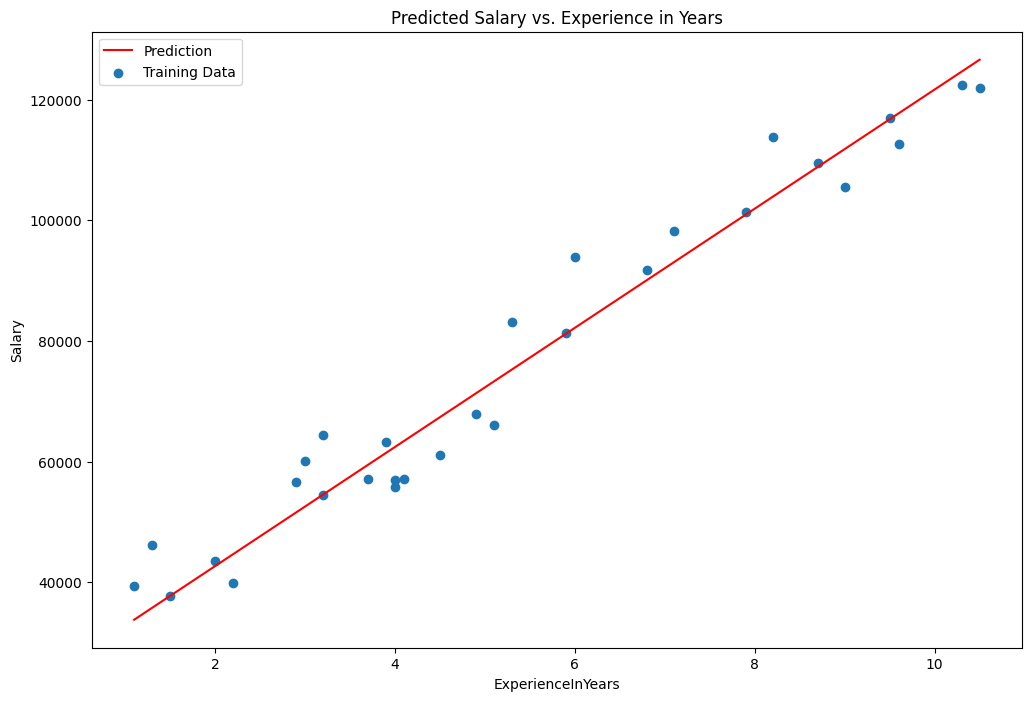

In [23]:
x = np.linspace(data.ExperienceInYears.min(), data.ExperienceInYears.max(), 100)
f = g[0,0] + (g[0,1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.ExperienceInYears, data.Salary, label = 'Training Data')
ax.legend(loc=2)
ax.set_xlabel('ExperienceInYears')
ax.set_ylabel('Salary')
ax.set_title('Predicted Salary vs. Experience in Years')

Text(0.5, 1.0, 'Error vs. Training Epoch')

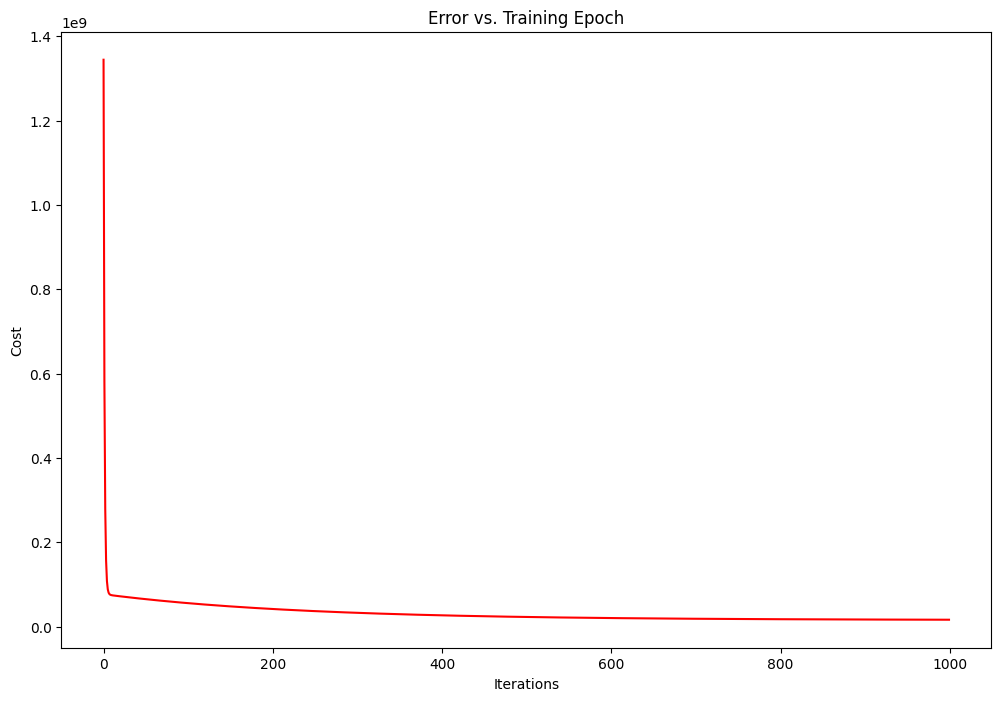

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')